<a href="https://colab.research.google.com/github/rryanqn/grupos_de_risco/blob/main/Projeto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto de Ciência de Dados 

Uma operadora de seguro de saúde identificou na sua base de dados de clientes, a relação entre os dados de colesterol e peso com a
incidência de problemas que influenciam no desenvolvimento de doenças cardíacas. Pensando по bem-estar dos seus clientes, e ao mesmo
 tempo pensando em diminuir problemas de internação e tratamento para esses tipos de causa, a operadora quer realizar um estudo para
 identificar o perfil de pessoas que se encaixam nos grupos de risco e assim realizar medidas preventivas e palestras de cuidados médicos.
 Para isso, a operadora conta com a equipe de cientistas de dados para ajudá-los a encontrar o grupo de risco dentre essas pessoas.

 Através da análise de dados, identificamos 3 principais grupos:


1.   Alto risco
2.   Risco Moderado
3.   Baixo risco






##Objetivos do projeto

*   Coleta de dados
*   Análise dos dados coletados
*   Realizar o tratamento de dados
*   Manipulação e visualização de dados
*   Aplicação de algoritmo de Machine Learning
*   Análise de dados gerados




##Importando as bibliotecas

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

##Verificando versão das bibliotecas

In [9]:
import sklearn
import plotly

print(f'''Verificando a versão das bibliotecas:
pandas: {pd.__version__}
sklearn: {sklearn.__version__}
plotly: {plotly.__version__}
''')

Verificando a versão das bibliotecas:
pandas: 1.5.3
sklearn: 1.2.2
plotly: 5.13.1



#Coleta de dados
Para esse projeto vamos utilizar dados já estruturados de dois tipos de arquivos:
*   xlxs
*   csv



##Coletando dados de estados brasileiros
---



In [10]:
estados = pd.read_csv('/content/estados_br.csv', sep=';', encoding='latin-1')
estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,NaN
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,NaN
4,5,Bahia,ba,Brasil


##Coletando dados de clientes

In [11]:
clientes = pd.read_excel('/content/clientes_operadora_saude.xlsx')
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


##Coletando dados das idades dos clientes

In [12]:
idades = pd.read_csv('/content/idade_clientes.csv', sep=';')
idades.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


#Analisando dados coletados

###Informações

In [13]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          22 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [14]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  225 non-null    int64  
 1   peso        222 non-null    float64
 2   colesterol  225 non-null    int64  
 3   genero      225 non-null    object 
 4   id_estado   225 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 8.9+ KB


In [15]:
idades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


###Describe

In [16]:
estados.describe()

,id_estado
count,27.000000
mean,14.000000
std,7.937254
min,1.000000
25%,7.500000
50%,14.000000
75%,20.500000
max,27.000000


In [17]:
clientes.describe()
#Podemos perceber que na coluna peso possui dados ausentes

,id_cliente,peso,colesterol,id_estado
count,225.000000,222.000000,225.000000,225.000000
mean,113.000000,142.315315,168.733333,13.711111
std,65.096083,31.198817,39.413671,7.562307
min,1.000000,95.000000,102.000000,1.000000
25%,57.000000,115.000000,135.000000,7.000000
50%,113.000000,138.500000,168.000000,14.000000
75%,169.000000,170.000000,204.000000,20.000000
max,225.000000,203.000000,235.000000,27.000000


In [18]:
idades.describe()

,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


##Analisando dados ausentes

In [19]:
clientes.isna().sum()

id_cliente    0
peso          3
colesterol    0
genero        0
id_estado     0
dtype: int64

In [20]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            5
dtype: int64

In [21]:
idades.isna().sum()

id_cliente    0
idade         0
dtype: int64

##Visualizando dados ausentes

In [22]:
clientes.loc[clientes['peso'].isnull()]

,id_cliente,peso,colesterol,genero,id_estado
32,33,NaN,188,Masculino,22
41,42,NaN,177,Masculino,20
87,88,NaN,168,Feminino,12


In [23]:
estados.loc[estados['pais'].isna()]

,id_estado,estado,sigla_estado,pais
1,2,Alagoas,al,NaN
3,4,Amazonas,am,NaN
7,8,Espírito Santo,es,NaN
17,18,Piauí,pi,NaN
23,24,Santa Catarina,sc,NaN


#Tratamento de dados

##Dados ausentes

Identicamos 3 valores ausentes na base de dados de clientes. Para esse caso, temos 3 opções para tratamento de dados númericos.
  1. Eliminação dos registros
  2. Média dos pesos dos clientes: Realiza a média dos pesos
      * OBS: A média é fortemente influenciada pela presença de valores extremos;
  3. Médiana dos pesos dos clientes. Realiza a mediana dos pesos. (medida que pega o valor central dos dados)


###Eliminação de dados

In [24]:
clientes.dropna(inplace=False)

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26
...,...,...,...,...,...
220,221,180.0,219,Masculino,20
221,222,116.0,138,Feminino,15
222,223,144.0,169,Feminino,18
223,224,102.0,116,Masculino,6


In [25]:
clientes.isna().sum()

id_cliente    0
peso          3
colesterol    0
genero        0
id_estado     0
dtype: int64

###Corrigindo dados ausentes por outras medidas (média/mediana)

In [26]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,225.000000,222.000000,225.000000,225.000000
mean,113.000000,142.315315,168.733333,13.711111
std,65.096083,31.198817,39.413671,7.562307
min,1.000000,95.000000,102.000000,1.000000
25%,57.000000,115.000000,135.000000,7.000000
50%,113.000000,138.500000,168.000000,14.000000
75%,169.000000,170.000000,204.000000,20.000000
max,225.000000,203.000000,235.000000,27.000000


In [27]:
#Criando variáveis para média e mediana
media = clientes['peso'].mean()
mediana = clientes['peso'].median()

In [28]:
print(f'O valor da média é:{media}.\n O valor da mediana é:{mediana}.')

O valor da média é:142.3153153153153.
 O valor da mediana é:138.5.


In [29]:
#Arrendondamento da média
round(media,2)

142.32

In [30]:
#Substituindo valores NA pela média
clientes['peso'].fillna(value=round(media,2), inplace=True)

In [31]:
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

##Dados ausentes para variável categórica

In [32]:
estados['pais'].value_counts()

Brasil    22
Name: pais, dtype: int64

In [33]:
correcao_pais = estados['pais'].mode()[0]
print(correcao_pais)

Brasil


In [34]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            5
dtype: int64

In [35]:
estados['pais'].fillna(correcao_pais, inplace=True)

In [36]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

#Manipulação e visualização de dados
---

Nesta etapa, vamos analisar os dados já tratados. A ideia é aprofundar um pouco mais na análise afim de identificar e conhecer mais os
dados.


<Axes: title={'center': 'Peso dos clientes'}, xlabel='Peso', ylabel='Nº de pessoas'>

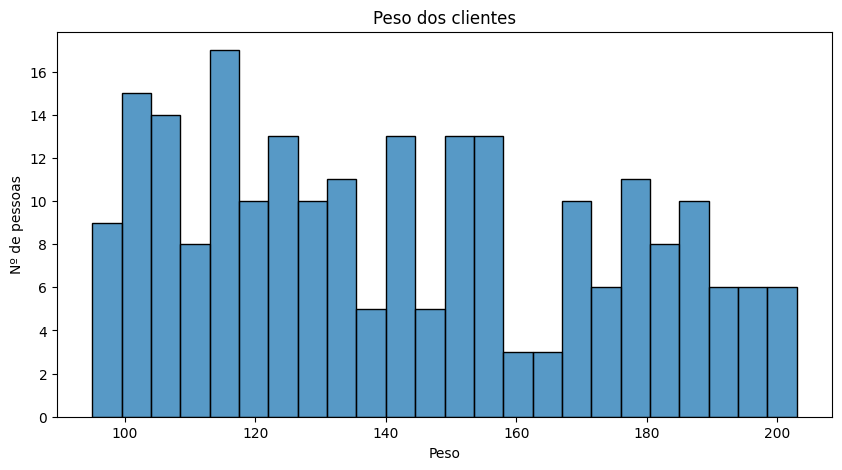

In [37]:
#Criando histograma baseado no peso dos clientes
plt.figure(figsize=(10,5))
plt.title('Peso dos clientes')
plt.ylabel('Nº de pessoas')
plt.xlabel('Peso')
sns.histplot(clientes['peso'], bins=24)

<Axes: title={'center': 'Colesterol por cliente'}, xlabel='Colesterol', ylabel='Nº de pessoas'>

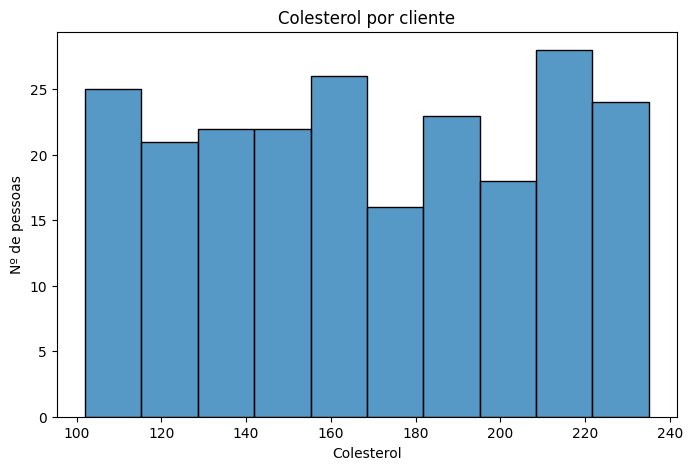

In [38]:
#Criando histograma baseado no Colesterol dos clientes
plt.figure(figsize=[8,5])
plt.title('Colesterol por cliente')
plt.xlabel('Colesterol')
plt.ylabel('Nº de pessoas')
sns.histplot(clientes['colesterol'], bins=10)

#Criando gráfico de boxplot
---

O boxplot ou diagrama de caixa é uma ferramenta gráfica que permite visualizar a distribuição e valores discrepantes (outliers) dos dados,
fornecendo assim um meio complementar para desenvolver uma perspectiva sobre o caráter dos dados. Além disso, O boxplot também é uma
disposição gráfica comparativa.

O Box Plot fornece informação sobre as seguintes características do conjunto de dados: localização, dispersão, assimetria, comprimento da
cauda e outliers (medidas discrepantes).

Em um boxplot são apresentadas 5 estatisticas: a minimo, o primeira quartil (Q1), a mediana, o terceiro quartil (Q3) e o máximo. Esses valores
também são chamados de resumo dos cinco números.


<Axes: title={'center': 'Idade dos clientes em boxplot'}, xlabel='Idade'>

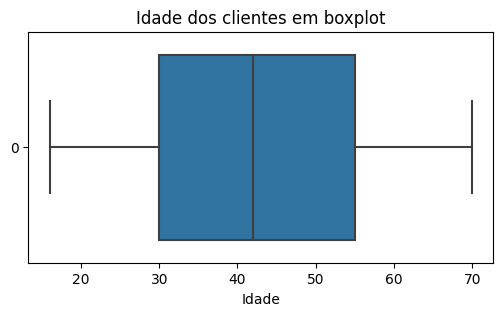

In [39]:
plt.figure(figsize=[6,3])
plt.title('Idade dos clientes em boxplot')
plt.xlabel('Idade')
sns.boxplot(data=idades['idade'],orient='h')

<Axes: title={'center': 'Colesterol dos clientes'}, xlabel='Colesterol', ylabel='Clientes'>

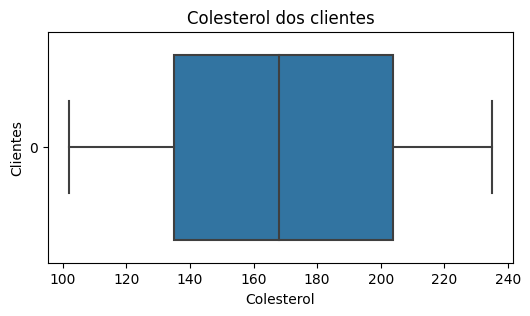

In [40]:
#Criando boxplot para o colesterol dos clientes
plt.figure(figsize=[6,3])
plt.title('Colesterol dos clientes')
plt.xlabel('Colesterol')
plt.ylabel('Clientes')
sns.boxplot(data=clientes['colesterol'], orient='h')

<Axes: title={'center': 'Peso dos clientes'}, xlabel='Peso', ylabel='Clientes'>

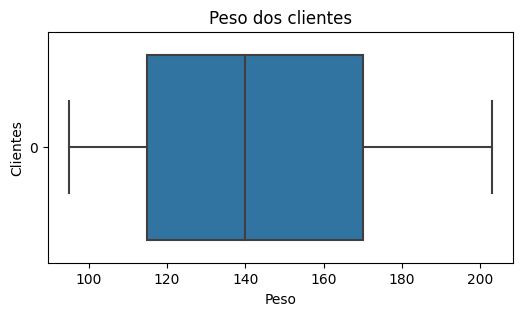

In [41]:
#Criando boxplot para peso dos clientes
plt.figure(figsize=[6,3])
plt.title('Peso dos clientes')
plt.xlabel('Peso')
plt.ylabel('Clientes')
sns.boxplot(data=clientes['peso'], orient='h')

<Axes: title={'center': 'Correlação entre Peso e Colesterol'}>

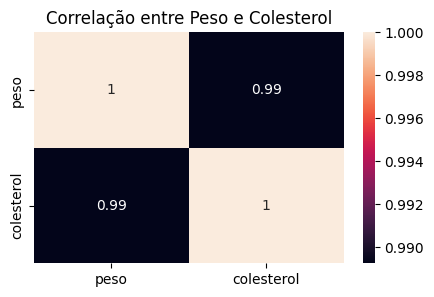

In [42]:
#Gerando correlação entre peso e colesterol
plt.figure(figsize=[5,3])
plt.title('Correlação entre Peso e Colesterol')
correlacao = clientes[['peso','colesterol']]

sns.heatmap(data=correlacao.corr(), annot=True)

#Enriquecendo dados coletados
---

Vamos enriquecer a base dados e realizar a junção entre os datasets

In [43]:
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


In [44]:
#Criando um Identificador para a variável gênero
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
clientes['id_genero'] = LE.fit_transform(clientes['genero'])

In [45]:
#Adicionamos uma coluna index acima para conseguirmos diferenciar os gêneros 
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado,id_genero
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1


##Junções entre os dados coletados


Vamos realizar o merge entre os dados que realizamos na coleta de dados

In [46]:
#Verificando dados de clientes
clientes[:10]

,id_cliente,peso,colesterol,genero,id_estado,id_genero
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
5,6,198.0,227,Masculino,8,1
6,7,114.0,131,Masculino,26,1
7,8,145.0,176,Feminino,25,0
8,9,191.0,223,Feminino,16,0
9,10,186.0,221,Masculino,6,1


In [47]:
#Verificando dados de estados
estados[:3]

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil


###Realizando junção entre dataset de clientes e estados

In [48]:
clientes_estados = pd.merge(left=clientes, right=estados, on='id_estado')
clientes_estados.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,id_genero,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
9,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil
21,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil
32,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil
39,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil
...,...,...,...,...,...,...,...,...,...
167,221,180.0,219,Masculino,20,1,Rio Grande do Norte,rn,Brasil
126,222,116.0,138,Feminino,15,0,Paraíba,pb,Brasil
196,223,144.0,169,Feminino,18,0,Piauí,pi,Brasil
77,224,102.0,116,Masculino,6,1,Ceará,ce,Brasil


###Realizando junção entre dataset de clientes_estados e idades

In [49]:
idades.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


In [50]:
#Realiza junção entre clientes e idades
clientes_idades = pd.merge(left=clientes_estados, right=idades, on='id_cliente').sort_values('id_cliente')
clientes_idades.head()

,id_cliente,peso,colesterol,genero,id_estado,id_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
9,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
21,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
32,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
39,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44


In [51]:
#Resetando o index do dataset criado
clientes_idades.reset_index(drop=True)

,id_cliente,peso,colesterol,genero,id_estado,id_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
3,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
4,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
220,221,180.0,219,Masculino,20,1,Rio Grande do Norte,rn,Brasil,33
221,222,116.0,138,Feminino,15,0,Paraíba,pb,Brasil,38
222,223,144.0,169,Feminino,18,0,Piauí,pi,Brasil,24
223,224,102.0,116,Masculino,6,1,Ceará,ce,Brasil,31


#Organizando a base de dados
---

##Alterando nome das colunas

In [52]:
clientes_idades.rename(columns={'id_cliente': 'cod_cliente', 'id_genero': 'cod_genero'}, inplace=True)

##Alterando conteúdo da variável silga do estado

In [53]:
#Alterando as linhas da variável sigla_estado
clientes_idades['sigla_estado'].str.upper()

0      RR
9      DF
21     AM
32     SC
39     SE
       ..
167    RN
126    PB
196    PI
77     CE
20     DF
Name: sigla_estado, Length: 225, dtype: object

In [54]:
#Inserindo alteração realizada
clientes_idades['sigla_estado'] = clientes_idades['sigla_estado'].str.upper()

In [55]:
clientes_idades[:3]

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,RR,Brasil,17
9,2,115.0,135,Masculino,7,1,Distrito Federal,DF,Brasil,28
21,3,115.0,136,Masculino,4,1,Amazonas,AM,Brasil,62


##Alterando disposição das colunas do dataframe

In [56]:
#Selecionar as ordens das colunas a serem visualizadas
ordem_colunas = ['cod_cliente','genero','estado','idade','peso','colesterol']
clientes_idades[ordem_colunas][:3]

,cod_cliente,genero,estado,idade,peso,colesterol
0,1,Masculino,Roraima,17,102.0,111
9,2,Masculino,Distrito Federal,28,115.0,135
21,3,Masculino,Amazonas,62,115.0,136


In [57]:
#Atribuindo alteração ao dataframe
clientes_idades = clientes_idades[ordem_colunas].reset_index(drop=True)

In [58]:
clientes_idades[:3]

,cod_cliente,genero,estado,idade,peso,colesterol
0,1,Masculino,Roraima,17,102.0,111
1,2,Masculino,Distrito Federal,28,115.0,135
2,3,Masculino,Amazonas,62,115.0,136


#Aplicação do Modelo de Machine Learning
---
É de etapa onde selecionamos os algoritmos de Machine Learning que serão inseridos para alcançar o resultado, levando em consideração o
conjunto de dedos obtidos na etapa anterior.

Para esse trabalho, vamos realizar um agrupamento de pessoas baseado по colestesterol, peso e idade das pessoas.


##Aplicando método do cotovelo

In [59]:
from sklearn.cluster import KMeans

In [60]:
#Criando função para calcular WCSS
def calcular_wcss(dados_cliente):
  wcss = []
  for k in range (1,11):
    kmeans = KMeans(n_clusters = k, random_state=0)
    kmeans.fit(X=dados_cliente)
    wcss.append(kmeans.inertia_)
  return wcss

In [61]:
#Filtrando dataset em peso, colesterol e idade
dados_clientes = clientes_idades[['peso','colesterol','idade']]
dados_clientes[:3]

,peso,colesterol,idade
0,102.0,111,17
1,115.0,135,28
2,115.0,136,62


In [62]:
#Calculando wcss com os dados de clientes
wcss_clientes = calcular_wcss(dados_clientes)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [63]:
#Visualizando os dados obtidos do WCSS
for i in range(len(wcss_clientes)):
  print(f'O cluster {i} tem o valor em WCSS de: {wcss_clientes[i]}')

O cluster 0 tem o valor em WCSS de: 615755.6435484447
O cluster 1 tem o valor em WCSS de: 189212.54409773235
O cluster 2 tem o valor em WCSS de: 110985.62659521378
O cluster 3 tem o valor em WCSS de: 85993.49644839708
O cluster 4 tem o valor em WCSS de: 72765.0926995486
O cluster 5 tem o valor em WCSS de: 60402.61567119764
O cluster 6 tem o valor em WCSS de: 49363.864657354534
O cluster 7 tem o valor em WCSS de: 42246.69687529805
O cluster 8 tem o valor em WCSS de: 36793.297727438636
O cluster 9 tem o valor em WCSS de: 31628.83439189302


##Visualizando o gráfico do cotovelo

In [64]:
grafico_wcss = px.line(x=range(1,11), y=wcss_clientes)
fig = go.Figure(grafico_wcss)

fig.update_layout(title='Calculando WCSS',
                  title_x = 0.5,
                  xaxis_title = 'Número de Clusters',
                  yaxis_title = 'Valor do WCSS',
                  template= 'plotly_white'
)
fig.show()

##Criando agrupamento para cada cliente
---
Vamos criar uma nova coluna com o nome do cluster que o algoritmo classificou o cliente da operadora.

In [65]:
#Aplicando algoritmo k-means
kmeans_clientes = KMeans(n_clusters=3, random_state=0)
clientes_idades['cluster'] = kmeans_clientes.fit_predict(dados_clientes)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [66]:
clientes_idades.tail()

,cod_cliente,genero,estado,idade,peso,colesterol,cluster
220,221,Masculino,Rio Grande do Norte,33,180.0,219,0
221,222,Feminino,Paraíba,38,116.0,138,1
222,223,Feminino,Piauí,24,144.0,169,2
223,224,Masculino,Ceará,31,102.0,116,1
224,225,Masculino,Distrito Federal,57,176.0,212,0


##Calculando centroides de cada cluster

In [67]:
dados_clientes[:3]

,peso,colesterol,idade
0,102.0,111,17
1,115.0,135,28
2,115.0,136,62


In [68]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[181.88235294, 216.33823529,  44.54411765],
       [109.79268293, 125.15853659,  42.63414634],
       [141.99946667, 173.21333333,  41.89333333]])

Aqui temos os centroides dos 3 clusters de acordo com os atributos. Nesse exemplo vemos os centroides de peso, colesterol e idade respectivamente.

In [69]:
grafico = px.scatter(x=clientes_idades['peso'], y=clientes_idades['colesterol'], color=clientes_idades['cluster'])
grafico_centroide = px.scatter(x = centroides_clusters[:,0],y = centroides_clusters[:,1],size = [7,7,7])
fig = go.Figure(data = grafico.data + grafico_centroide.data)
fig.update_layout(title='Análise de Clusters',xaxis_title = 'Peso', yaxis_title = 'Colesterol')

fig.show()

#Criando função para gerar gráficos
---

In [70]:
def gera_grafico(x,y,x_label,y_label):
  grafico = px.scatter(x=x,y=y,color=clientes_idades['cluster'])
  fig = go.Figure(grafico)
  fig.update_layout(title='Análise de Clusters',xaxis_title= x_label, yaxis_title= y_label)
  fig.show()

In [71]:
gera_grafico(clientes_idades['colesterol'], clientes_idades['peso'], 'Colesterol', 'Peso')

In [72]:
gera_grafico(clientes_idades['peso'], clientes_idades['colesterol'], 'Peso', 'Colesterol')

In [73]:
gera_grafico(clientes_idades['idade'], clientes_idades['colesterol'], 'Idade', 'Colesterol')

#Analisando dados gerados

Após a aplicação do algoritmo Machine Learning, vamos analisar os dados e realizar a segmentação dos clientes baseados no clusters criados.

##Segmentando os clientes baseado na análise dos clusters
Agora vamos analisar os dados dos clusters referente aos atributos peso e colesterol e atribuir nomes que representam aquele agrupamento.
Vamos agrupar em 3 classes:
* Baixo risco: Peso e colesterol baixos
* Moderado risco: Peso e colesterol medianos
* Alto risco: Peso e colesterol altos

In [74]:
#Gerando gráfico da análise dos clusters
gera_grafico(clientes_idades['colesterol'],clientes_idades['peso'], 'Colesterol', 'Peso')

In [75]:
# Realizar uma cópia dos dados de clientes
cluster_clientes = clientes_idades

In [76]:
cluster_clientes.loc[cluster_clientes['cluster']== 1,'nome_cluster']='Risco Baixo'
cluster_clientes.loc[cluster_clientes['cluster']== 2,'nome_cluster']='Risco Moderado'
cluster_clientes.loc[cluster_clientes['cluster']== 0,'nome_cluster']='Risco Alto'

In [77]:
#Visualizando os dados
cluster_clientes.tail()

,cod_cliente,genero,estado,idade,peso,colesterol,cluster,nome_cluster
220,221,Masculino,Rio Grande do Norte,33,180.0,219,0,Risco Alto
221,222,Feminino,Paraíba,38,116.0,138,1,Risco Baixo
222,223,Feminino,Piauí,24,144.0,169,2,Risco Moderado
223,224,Masculino,Ceará,31,102.0,116,1,Risco Baixo
224,225,Masculino,Distrito Federal,57,176.0,212,0,Risco Alto


##Criando análises gráficas

<Axes: title={'center': 'Gráfico de boxplot'}, xlabel='colesterol', ylabel='estado'>

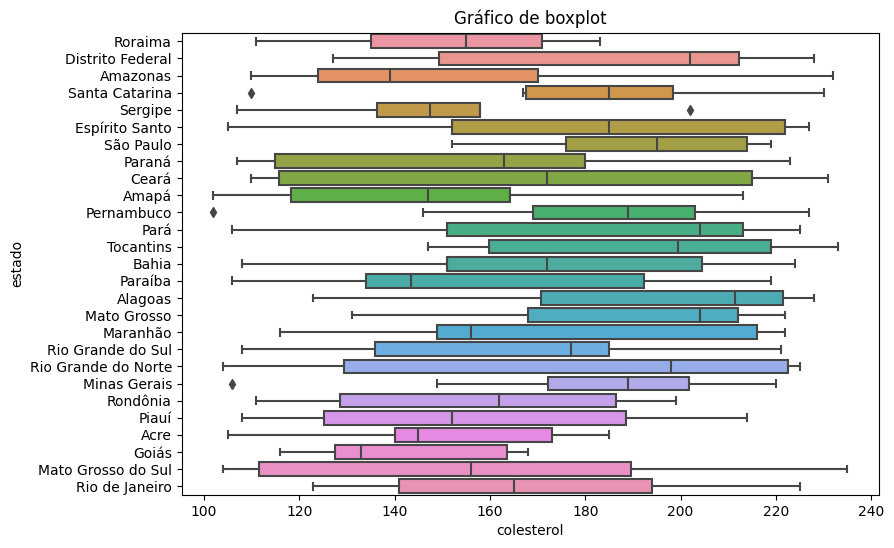

In [94]:
#Criando gráfico de boxplot da distribuição de colesterol por estado
plt.figure(figsize=(9,6))
plt.title('Gráfico de boxplot')
sns.boxplot(data=cluster_clientes, orient='h', x='colesterol', y='estado')

<Axes: title={'center': 'Gráfico de boxplot'}, xlabel='peso', ylabel='estado'>

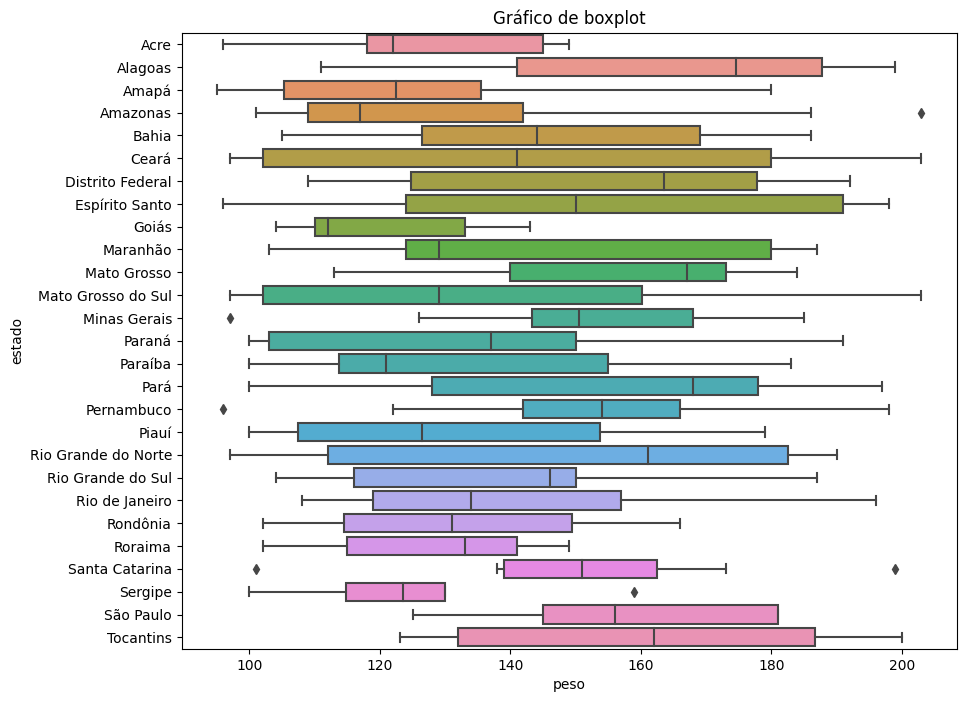

In [79]:
plt.figure(figsize=(10,8))
plt.title('Gráfico de boxplot')
sns.boxplot(data=cluster_clientes.sort_values('estado'), orient='h', x='peso', y='estado')

<Axes: title={'center': 'Gráfico de boxplot'}, xlabel='colesterol', ylabel='nome_cluster'>

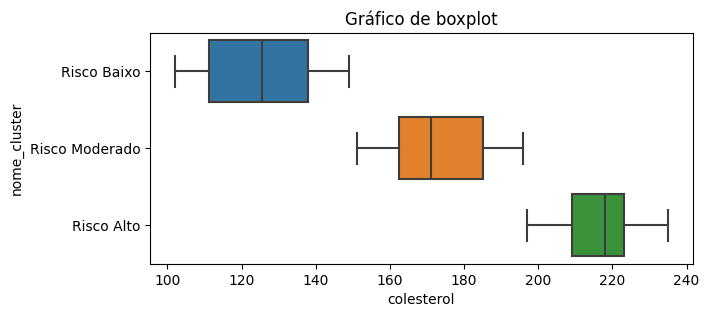

In [80]:
plt.figure(figsize=(7,3))
plt.title('Gráfico de boxplot')
sns.boxplot(data=cluster_clientes, orient='h', x='colesterol', y='nome_cluster')

<Axes: title={'center': 'Gráfico de boxplot'}, xlabel='peso', ylabel='nome_cluster'>

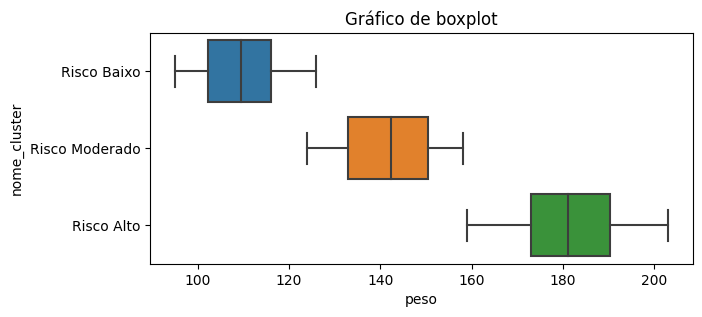

In [81]:
plt.figure(figsize=(7,3))
plt.title('Gráfico de boxplot')
sns.boxplot(data=cluster_clientes, orient='h', x='peso', y='nome_cluster')

<Axes: title={'center': 'Gráfico de boxplot'}, xlabel='idade', ylabel='nome_cluster'>

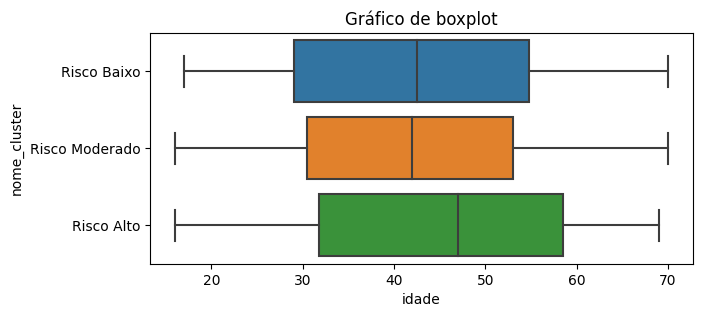

In [82]:
plt.figure(figsize=(7,3))
plt.title('Gráfico de boxplot')
sns.boxplot(data=cluster_clientes, orient='h', x='idade', y='nome_cluster')

#Análise dos clusters criados

In [83]:
#Agrupando dados de cluster por genero
cluster_clientes.groupby(['nome_cluster','genero'], as_index=False).agg(total=('genero','count'))

,nome_cluster,genero,total
0,Risco Alto,Feminino,28
1,Risco Alto,Masculino,40
2,Risco Baixo,Feminino,39
3,Risco Baixo,Masculino,43
4,Risco Moderado,Feminino,44
5,Risco Moderado,Masculino,31


In [84]:
cluster_clientes.groupby(['nome_cluster','genero','estado'], as_index=False).agg(media=('peso','mean'))

,nome_cluster,genero,estado,media
0,Risco Alto,Feminino,Amazonas,164.000000
1,Risco Alto,Feminino,Bahia,185.500000
2,Risco Alto,Feminino,Ceará,177.000000
3,Risco Alto,Feminino,Distrito Federal,181.666667
4,Risco Alto,Feminino,Espírito Santo,193.000000
...,...,...,...,...
111,Risco Moderado,Masculino,Rio de Janeiro,141.000000
112,Risco Moderado,Masculino,Rondônia,139.440000
113,Risco Moderado,Masculino,Roraima,145.333333
114,Risco Moderado,Masculino,Santa Catarina,151.500000


In [85]:
#Criar dataframe com as médias dos pesos
media_pesos = cluster_clientes.groupby(['nome_cluster','genero','estado'], as_index=False).agg(media=('peso','mean'))

<ipython-input-86-a245576ae74b>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




<Axes: title={'center': 'Distribuição das médias por cluster'}, xlabel='nome_cluster', ylabel='media'>

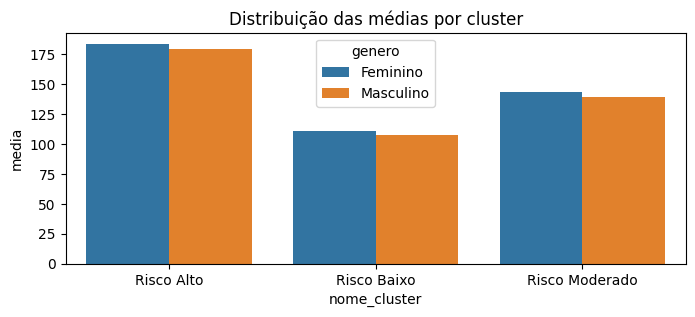

In [86]:
#Criar gráfico de barras com as médias dos pesos por cluster
plt.figure(figsize=(8,3))
plt.title('Distribuição das médias por cluster')
sns.barplot(x='nome_cluster', y='media', data=media_pesos, hue='genero', ci=None)

In [87]:
#Verifica os valores de idade por cluster
cluster_clientes.groupby('nome_cluster')['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Risco Alto,68.0,44.544118,15.977067,16.0,31.75,47.0,58.50,69.0
Risco Baixo,82.0,42.634146,15.442056,17.0,29.00,42.5,54.75,70.0
Risco Moderado,75.0,41.893333,14.699304,16.0,30.50,42.0,53.00,70.0


In [88]:
#Verifica os valores de estado por cluster
cluster_clientes.groupby('nome_cluster')['estado'].describe()

,count,unique,top,freq
nome_cluster,,,,
Risco Alto,68,24,Distrito Federal,6
Risco Baixo,82,26,Amazonas,8
Risco Moderado,75,26,Roraima,5


In [89]:
#Visualizando dados de clientes de Alto Risco
cluster_clientes.query('nome_cluster=="Risco Alto" and estado =="São Paulo"')

,cod_cliente,genero,estado,idade,peso,colesterol,cluster,nome_cluster
149,150,Feminino,São Paulo,39,181.0,214,0,Risco Alto
219,220,Masculino,São Paulo,32,181.0,219,0,Risco Alto


In [90]:
#Realizando agrupamento por numero de cluster e genero / peso
cluster_clientes.groupby(['nome_cluster', 'genero']) ['peso'].describe()

count        mean        std    min     25%     50%  \
nome_cluster   genero                                                           
Risco Alto     Feminino    28.0  183.571429  10.318730  161.0  178.00  185.00   
               Masculino   40.0  180.700000  11.688697  159.0  172.50  179.00   
Risco Baixo    Feminino    39.0  111.153846   8.692218   96.0  106.00  112.00   
               Masculino   43.0  108.558140   8.511343   95.0  102.00  106.00   
Risco Moderado Feminino    44.0  142.825455  10.115751  124.0  134.75  142.00   
               Masculino   31.0  140.827097  10.087216  124.0  130.50  142.32   

                             75%    max  
nome_cluster   genero                    
Risco Alto     Feminino   191.00  203.0  
               Masculino  187.25  203.0  
Risco Baixo    Feminino   118.00  126.0  
               Masculino  115.50  124.0  
Risco Moderado Feminino   153.25  158.0  
               Masculino  149.50  157.0

#Exportando dados

In [91]:
cluster_clientes.to_csv('classificacao_clientes_cluster.csv', sep=';', encoding='latin-1')